降低维度：
    特征越多，本质上意味着可以解释数据集中更多的变化。但是，如果考虑的特征超过了所需的特征，分类器甚至会考虑所有的异常值或者会过拟合数据集。因此，分类器的性能开始下降，而不是上升.

我们如何为我们的数据集寻找一个看似最优的维数呢？
    这就是降维发挥作用的地方了。有一组技术允许我们在不丢失太多信息的情况下，找到高维数据的一种紧凑表示.
    是否可以有一个更小、更紧凑的表示方法（使用小于m n个特征）来同样好地描述所有这些特征



1.用opencv PCA实现数据的主成分分析
2.使用 ICA 独立成分分析
3.实现非负矩阵分解
4.使用t-SNE t-分布随机领域嵌入可视化降维


独立成分分析：  scikit-learn
从decomposition(分解)模块可以获得ICA：

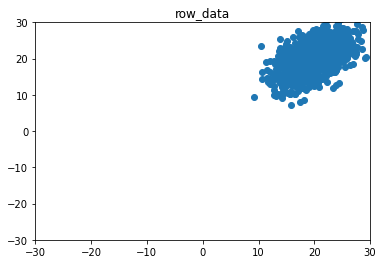

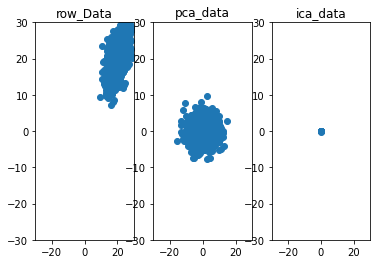

In [101]:
'''PCA 主成分分析与独立成分分析'''
import numpy as np
import cv2
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=16) #导入本地汉字字库
%matplotlib inline
mean = [20,20]
cov = [[12,8],[8,18]]
np.random.seed(42)
x,y = np.random.multivariate_normal(mean,cov,1000).T
plt.scatter(x, y )
plt.axis([-30,30,-30,30])
plt.title('row_data')
plt.show()


X = np.stack((x,y),axis =1)
mu ,eig= cv2.PCACompute(X, np.array([]))
X2 = cv2.PCAProject(X,mu,eig)
# X,X2 shape ((1000, 2), (1000, 2))


from sklearn import decomposition
ICA = decomposition.FastICA(tol = 0.05)
X3 = ICA.fit_transform(X)

d = [X,X2,X3]
title =['0','row_Data','pca_data','ica_data']
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.scatter(d[i-1][:,0],d[i-1][:,1],label = f'compare  {i}')
    plt.title(title[i])
    plt.axis([-30,30,-30,30])

plt.show()

# # eigenvectors 特征向量
# print(f'{mean1.shape},{eig1.shape}') #((1, 1000), (2, 1000))
# #根据分析的主成分，旋转数据
# x2,y2 = cv2.PCAProject(X1,mean1,eig1)
# print(x2.shape,y2.shape)
# X1.shape,mean1.shape,eig1.shape

此时,其返回了两个参数,mu和eig,形状如注释所述
在投影之前减去均值（mean）和协方差矩阵的特征向量（eig)

非负矩阵分解(Non- negative matrix factorization)

E:\anaconda\envs\notebook\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
E:\anaconda\envs\notebook\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


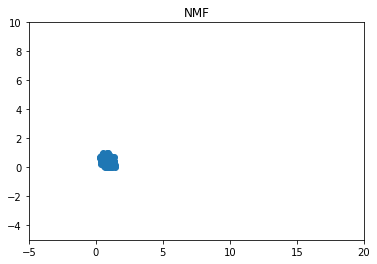

In [102]:
NMF = decomposition.NMF()
X4 = NMF.fit_transform(X)
plt.scatter(X4[:,0],X4[:,1])
plt.axis([-5,20,-5,10])
plt.title('NMF')
plt.show()

使用T-分布随机嵌入可视化降维
t-SNE
1）加载数据集：
2)先应用诸如PCA的降维技术将高维数降低到较低维数，然后再使用t-SNE之类的技术可视化数据
3）最后,使用散点图,将t-SNE提取出的二维空间进行可视化：


In [25]:
'''例子1，64个特征的数字识别即64维度，使用降维技术并可视化'''
#加载数据集
digits = sklearn.datasets.load_digits()
#digits 的属性
# ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
# data shape(1797, 64)  target.shape (1797,) images.shape(1797, 8, 8)
data = digits.images.reshape(1797,64)
len(digits.feature_names) # 一共有64个特征

64

In [26]:



'''cv-pca 主成分分析'''
mean ,eig= cv2.PCACompute(data, np.array([]))# mean均值，eig向量
data1 = cv2.PCAProject(data,mean,eig)


'''sklearn-PCA 主成分分析'''
PCA = decomposition.PCA()
data2 = PCA.fit_transform(data)

'''sklearn - ICA独立成分分析'''
ICA = decomposition.FastICA()
data3 = ICA.fit_transform(data)


'''t-SNE 可视化降维'''
dd= np.array([data,data1,data2,data3])
X1 = np.array([])
Y1 = np.array([])
X1,Y1 = dd/255.0,digits.target
tsne_result = []
#X1.shape,Y1.shape  ((4, 1797, 64), (1797,))

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
for i in range(4):
    tsne_i= tsne.fit_transform(X1[0],Y1)
    tsne_result.append(tsne_i)


E:\anaconda\envs\notebook\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.048776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.004730
[t-SNE] KL divergence after 300 iterations: 0.930919
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.048776
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.104973
[t-SNE] KL divergence after 300 iterations: 0.926407
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 

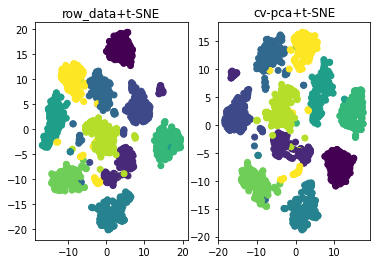

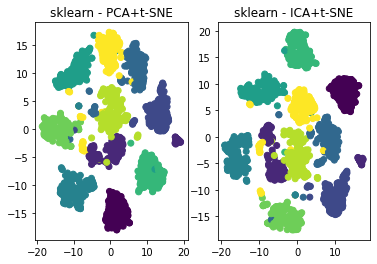

In [27]:
tsne_result = np.array(tsne_result)
'''matplot 散点图画图对比 '''
plt.subplot(1,2,1)
plt.scatter(tsne_result[0,:,0],tsne_result[0,: ,1],c = Y1/10.0)
plt.title('row_data+t-SNE')


plt.subplot(1,2,2)
plt.scatter(tsne_result[1,:,0],tsne_result[1,: ,1],c = Y1/10.0)
plt.title('cv-pca+t-SNE')
plt.show()

plt.subplot(1,2,1)
plt.scatter(tsne_result[2,:,0],tsne_result[2,: ,1],c = Y1/10.0)
plt.title('sklearn - PCA+t-SNE')

plt.subplot(1,2,2)
plt.scatter(tsne_result[3,:,0],tsne_result[3,: ,1],c = Y1/10.0)
plt.title('sklearn - ICA+t-SNE')
plt.show()

如结果所示, 若不经过诸如PCA的降维技术
直接由t-sne 处理,结果较差.
在4幅图片中可以看出,sklearn-ica+t-sne模式的结果较好

In [53]:
'''例子二，'''
import pandas as pd
breast_cancer = datasets.load_breast_cancer()
breast_cancer_data = breast_cancer.data
feature = pd.DataFrame(breast_cancer.feature_names)
feature ,breast_cancer_data.shape# 一共30个特征     (569, 30))

(                          0
 0               mean radius
 1              mean texture
 2            mean perimeter
 3                 mean area
 4           mean smoothness
 5          mean compactness
 6            mean concavity
 7       mean concave points
 8             mean symmetry
 9    mean fractal dimension
 10             radius error
 11            texture error
 12          perimeter error
 13               area error
 14         smoothness error
 15        compactness error
 16          concavity error
 17     concave points error
 18           symmetry error
 19  fractal dimension error
 20             worst radius
 21            worst texture
 22          worst perimeter
 23               worst area
 24         worst smoothness
 25        worst compactness
 26          worst concavity
 27     worst concave points
 28           worst symmetry
 29  worst fractal dimension,
 (569, 30))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 12.326882
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.304100
[t-SNE] KL divergence after 300 iterations: 1.072047


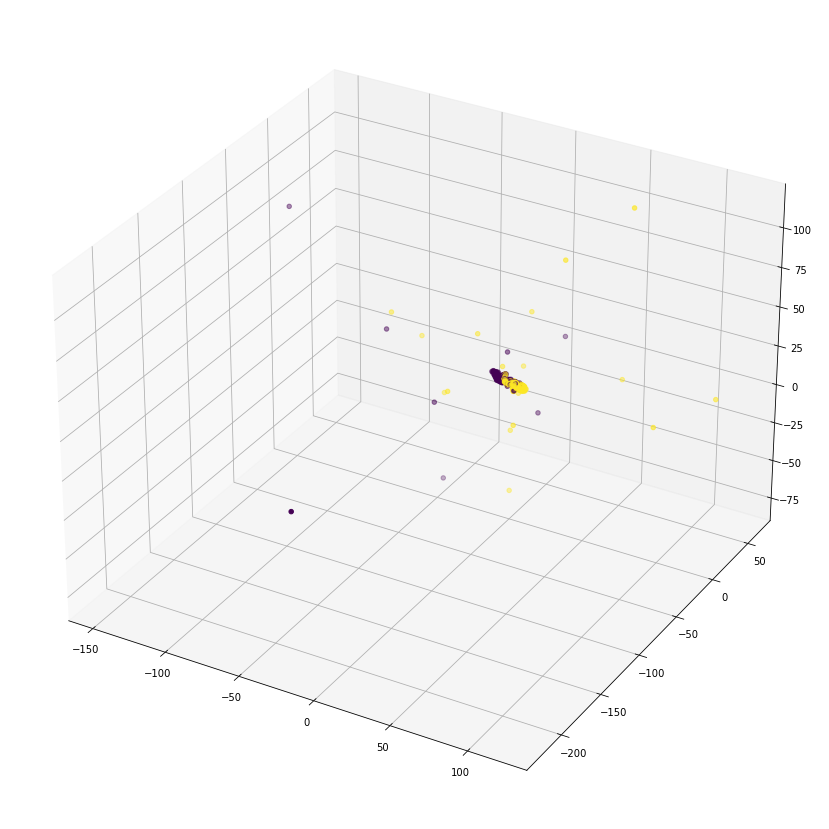

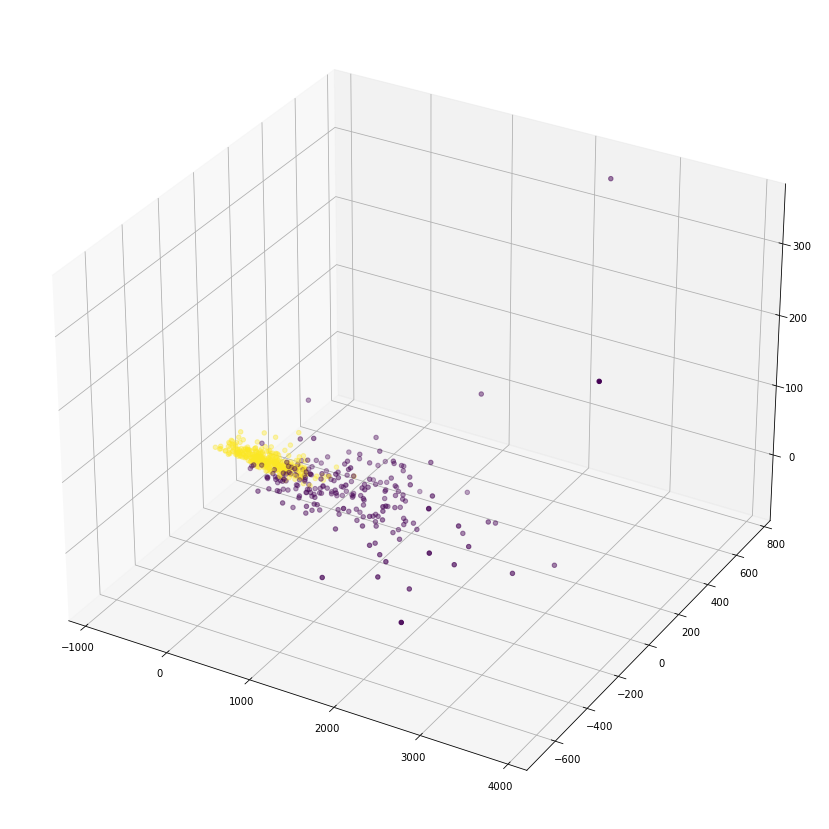

In [76]:
Pca = decomposition.PCA(n_components=4) # 指定需要几个主成分
pca_data =Pca.fit_transform(breast_cancer_data)
from sklearn.manifold import TSNE

pd_pca_data = pd.DataFrame(pca_data)
pd_pca_data  #shape 为 569，3

'''pca + TSNE 可视化降维'''
tsne = TSNE(n_components=3,verbose=1,perplexity=40,n_iter=300)
#barnes_hut算法来说，n_components'应该低于4，因为它依赖于四叉树或八叉树。
#
pca_tsne= tsne.fit_transform(pca_data,breast_cancer.target)
#pca_tsne.shape  (569, 2)   这种降维方法最多智能保留三个成分
plt.figure(figsize=(15,15))
ax = plt.axes(projection = '3d')
ax.scatter3D(pca_tsne[:,0],pca_tsne[: ,1],pca_tsne[: ,2],c =breast_cancer.target/10 )



'''pca 三特征数据可视化 三维'''
from mpl_toolkits import mplot3d
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=16) #导入本地汉字字库
plt.figure(figsize=(15,15))
ax = plt.axes(projection = '3d')
ax.scatter3D(pca_data[:,0],pca_data[: ,1],pca_data[: ,2],c =breast_cancer.target/10 )


由于决策树会使用gini基数或者信息增益来作为分类的决策算法
我们也可以粗略的建立一颗决策树来查看对于分类的主要影响特征是什么

In [93]:
'''使用决策树查看 影响决策的最重要特征,'''
from sklearn import tree
from sklearn import model_selection
feature_names = breast_cancer.feature_names
target,Data = breast_cancer.target,breast_cancer.data
target_names = breast_cancer.target_names

xTrain,xTest,yTrain,yTest = sklearn.model_selection.train_test_split(Data,target,test_size=0.1,random_state=7)
dtree = tree.DecisionTreeClassifier(max_depth=17,min_samples_leaf=40,criterion='gini')
dtree.fit(xTrain,yTrain)
print(dtree.score(xTest,yTest)) #决策树的性能 0.97

0.9649122807017544


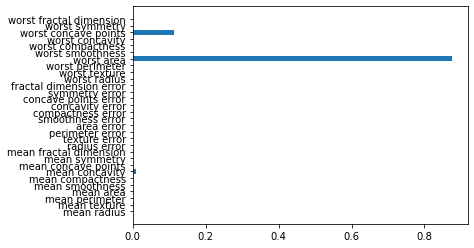

23

In [90]:
'''最重要的特征'''
dtree_importance = dtree.feature_importances_
%matplotlib inline
pd_1 = pd.DataFrame(dtree_importance)
plt.barh(range(len(feature_names)),dtree_importance,tick_label = feature_names)
plt.show()
np.argmax(dtree_importance)